# __New York Taxi Driver Analysis__

##### Problem Definition: Predict the average income of a taxi driver in NYC. Done by hour and by region.

##### This is a guided project by [Misra Turp](#https://www.youtube.com/playlist?list=PLM8lYG2MzHmTgsYKLJtdKwf6tHVbui9eE) in combination with the information learned in the IBM Data Science Professional Certification course.


## Import Libraries

In [829]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Import Dataset

In [458]:
taxi_jan_2025 = pd.read_parquet('data/yellow_tripdata_2025-01.parquet')

## Concatenating data sets to allow later months to be added in the future.
taxi_data = pd.concat([taxi_jan_2025])

In [459]:
taxi_data.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2025-01-01 00:18:38   2025-01-01 00:26:59              1.0   
1         1  2025-01-01 00:32:40   2025-01-01 00:35:13              1.0   
2         1  2025-01-01 00:44:04   2025-01-01 00:46:01              1.0   
3         2  2025-01-01 00:14:27   2025-01-01 00:20:01              3.0   
4         2  2025-01-01 00:21:34   2025-01-01 00:25:06              3.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.60         1.0                  N           229           237   
1           0.50         1.0                  N           236           237   
2           0.60         1.0                  N           141           141   
3           0.52         1.0                  N           244           244   
4           0.66         1.0                  N           244           116   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1         10.0    3.5      0.5        3.00           0.0   
1             1          5.1    3.5      0.5        2.02           0.0   
2             1          5.1    3.5      0.5        2.00           0.0   
3             2          7.2    1.0      0.5        0.00           0.0   
4             2          5.8    1.0      0.5        0.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  
0                    1.0         18.00                   2.5          0.0  
1                    1.0         12.12                   2.5          0.0  
2                    1.0         12.10                   2.5          0.0  
3                    1.0          9.70                   0.0          0.0  
4                    1.0          8.30                   0.0          0.0

In [463]:
taxi_data.shape

(3475226, 19)

## 2. Exploratory Data Analysis (EDA)

### 2.1 - Dropping Unnecessary Columns

In [467]:
taxi_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')

In [469]:
## Removing unnecessary columns
taxi_data = taxi_data.drop(columns=['store_and_fwd_flag','fare_amount','extra','mta_tax','tip_amount','tolls_amount',
                                    'improvement_surcharge','congestion_surcharge','Airport_fee'])

In [471]:
taxi_data.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2025-01-01 00:18:38   2025-01-01 00:26:59              1.0   
1         1  2025-01-01 00:32:40   2025-01-01 00:35:13              1.0   
2         1  2025-01-01 00:44:04   2025-01-01 00:46:01              1.0   
3         2  2025-01-01 00:14:27   2025-01-01 00:20:01              3.0   
4         2  2025-01-01 00:21:34   2025-01-01 00:25:06              3.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           1.60         1.0           229           237             1   
1           0.50         1.0           236           237             1   
2           0.60         1.0           141           141             1   
3           0.52         1.0           244           244             2   
4           0.66         1.0           244           116             2   

   total_amount  
0         18.00  
1         12.12  
2         12.10  
3          9.70  
4          8.30

### 2.2 - Visualizing Data to Spot Abnormalities

array([[<Axes: title={'center': 'VendorID'}>,
        <Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>],
       [<Axes: title={'center': 'passenger_count'}>,
        <Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'RatecodeID'}>],
       [<Axes: title={'center': 'PULocationID'}>,
        <Axes: title={'center': 'DOLocationID'}>,
        <Axes: title={'center': 'payment_type'}>],
       [<Axes: title={'center': 'total_amount'}>, <Axes: >, <Axes: >]],
      dtype=object)

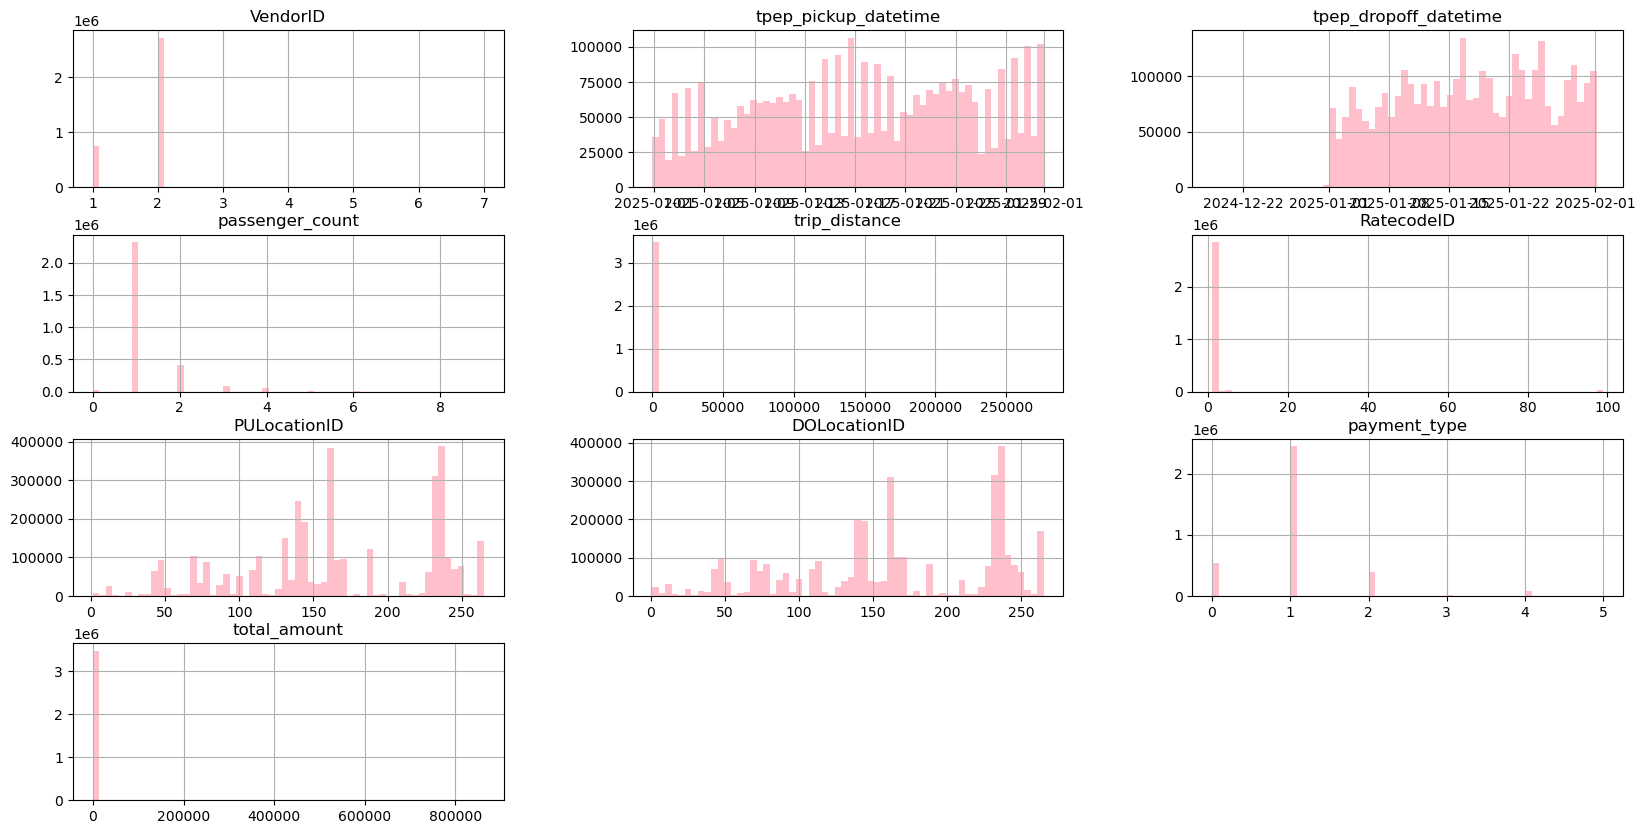

In [864]:
## Plotting using the Historgram
taxi_data.hist(figsize=(20,10), bins=60, color='pink')

In [478]:
taxi_data['RatecodeID'].value_counts()

RatecodeID
1.0     2756472
2.0       94420
99.0      41963
5.0       26501
3.0        8622
4.0        7092
6.0           7
Name: count, dtype: int64

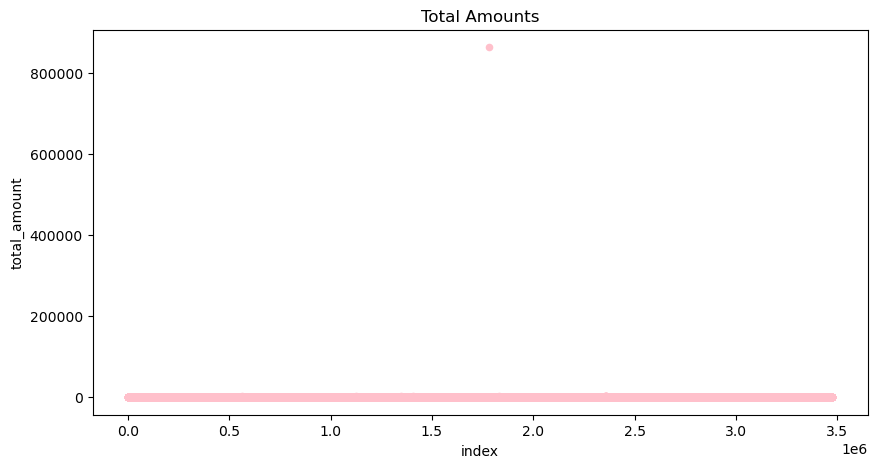

In [858]:
taxi_data.reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5), color='pink')
plt.title("Total Amounts")
plt.show()

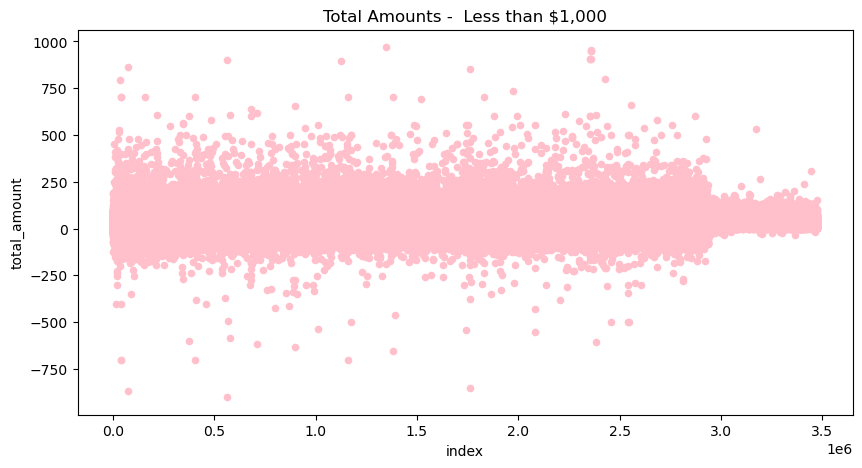

In [857]:
taxi_data[taxi_data['total_amount']<1000].reset_index().plot(kind='scatter', color='pink', y='total_amount', x='index', figsize=(10,5))
plt.title("Total Amounts -  Less than $1,000")
plt.show()

In [483]:
## Printing the negative values 
print(taxi_data[taxi_data['total_amount']<0].shape)

(63037, 10)


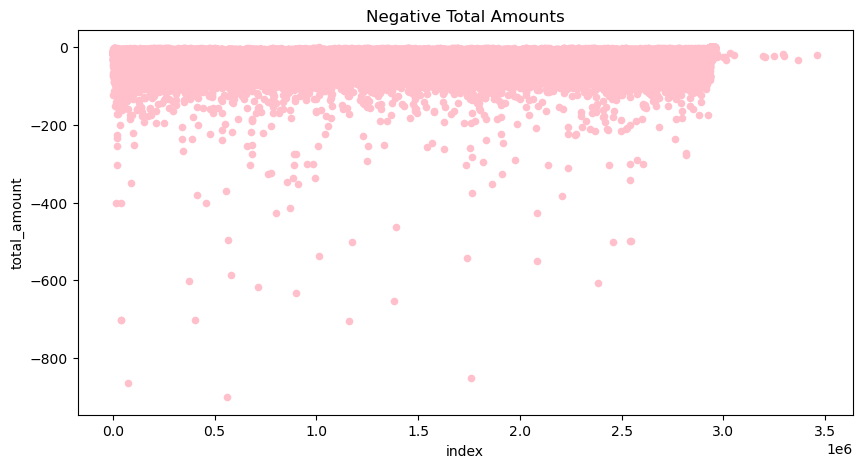

In [855]:
taxi_data[taxi_data['total_amount']<0].reset_index().plot(kind='scatter', color='pink', y='total_amount', x='index', figsize=(10,5))
plt.title("Negative Total Amounts")
plt.show()

In [488]:
taxi_data[taxi_data['total_amount']<0].head(10)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
17          2  2025-01-01 00:01:41   2025-01-01 00:07:14              1.0   
22          2  2025-01-01 00:55:54   2025-01-01 01:00:38              1.0   
104         2  2025-01-01 00:56:12   2025-01-01 01:15:00              1.0   
149         2  2025-01-01 00:55:53   2025-01-01 01:06:49              1.0   
202         2  2025-01-01 00:29:35   2025-01-01 00:36:02              1.0   
212         2  2025-01-01 00:11:44   2025-01-01 00:25:41              2.0   
364         2  2025-01-01 00:11:58   2025-01-01 00:12:31              1.0   
400         2  2025-01-01 00:09:58   2025-01-01 00:14:28              1.0   
492         2  2025-01-01 00:50:13   2025-01-01 01:11:20              1.0   
640         2  2025-01-01 00:51:05   2025-01-01 00:54:12              1.0   

     trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
17            0.71         1.0            79           107             2   
22            0.69         1.0           137           233             4   
104           0.97         1.0           161           170             4   
149           1.42         1.0            79            45             2   
202           0.60         1.0            79           148             4   
212           1.88         1.0            79           161             4   
364           0.01         1.0            42            42             4   
400           0.60         1.0           140           263             2   
492           3.84         1.0            48           151             2   
640           0.92         1.0           142           239             2   

     total_amount  
17          -8.54  
22         -11.50  
104        -21.30  
149        -17.10  
202        -12.20  
212        -19.20  
364         -5.50  
400        -11.50  
492        -29.00  
640        -11.50

In [490]:
taxi_data[taxi_data['total_amount']<0]['payment_type'].value_counts()

payment_type
4    37410
2    14111
3     8080
0     3421
1       15
Name: count, dtype: int64

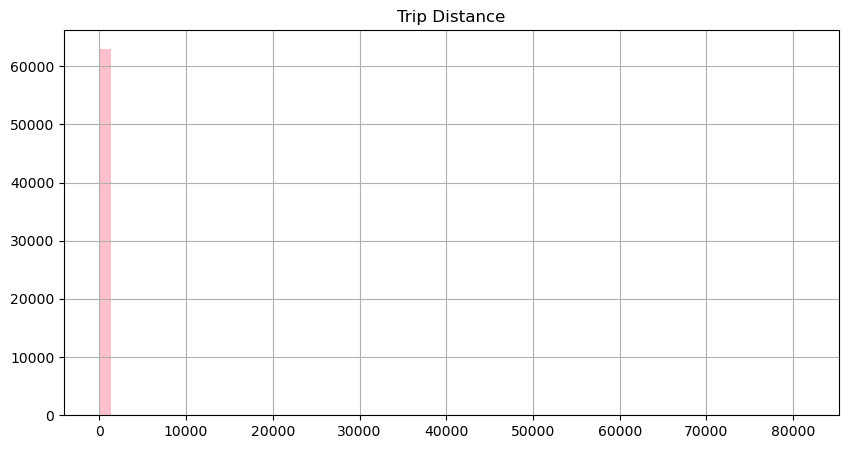

In [853]:
taxi_data[taxi_data['total_amount']<0]['trip_distance'].hist(bins=60, figsize=(10,5), color='pink')
plt.title("Trip Distance")
plt.show()

In [494]:
print(taxi_data[taxi_data['total_amount']==0].shape)
taxi_data[taxi_data['total_amount']==0].head()

(559, 10)


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
10261         2  2025-01-01 01:30:13   2025-01-01 01:30:31              1.0   
18189         1  2025-01-01 03:57:21   2025-01-01 04:02:26              1.0   
19155         1  2025-01-01 03:27:25   2025-01-01 03:43:43              1.0   
21300         2  2025-01-01 04:03:25   2025-01-01 04:11:42              2.0   
21920         2  2025-01-01 04:24:55   2025-01-01 04:29:57              4.0   

       trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
10261           0.00         1.0           226           226             2   
18189           0.40         1.0           158           125             3   
19155           3.50         1.0           144           163             4   
21300           4.69         1.0           255            97             2   
21920           1.72         1.0             7             7             2   

       total_amount  
10261           0.0  
18189           0.0  
19155           0.0  
21300           0.0  
21920           0.0

In [496]:
taxi_data[taxi_data['total_amount']==0]['payment_type'].value_counts()

payment_type
4    238
3    155
1     78
0     47
2     40
5      1
Name: count, dtype: int64

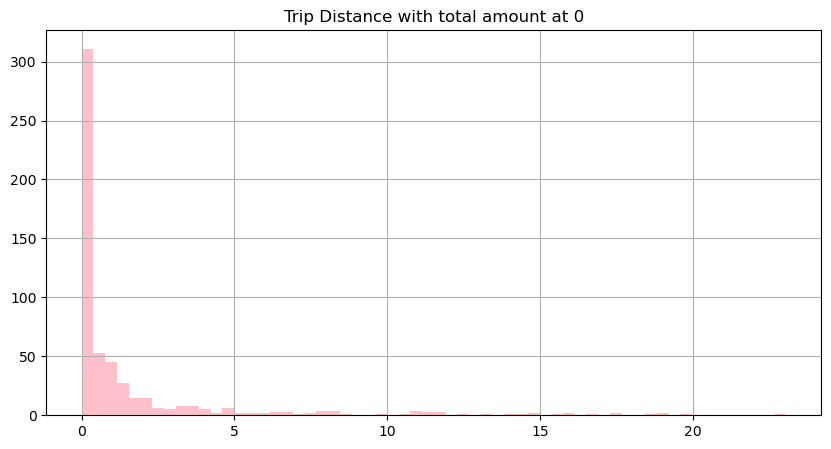

In [851]:
taxi_data[taxi_data['total_amount']==0]['trip_distance'].hist(bins=60, figsize=(10,5), color='pink')
plt.title("Trip Distance with total amount at 0")
plt.show()

In [500]:
taxi_data[taxi_data['total_amount']==0]['trip_distance'].value_counts()

trip_distance
0.00     262
0.10      19
0.50      17
0.40      15
0.30      14
        ... 
1.46       1
6.60       1
1.72       1
1.45       1
14.68      1
Name: count, Length: 112, dtype: int64

<Axes: xlabel='index', ylabel='total_amount'>

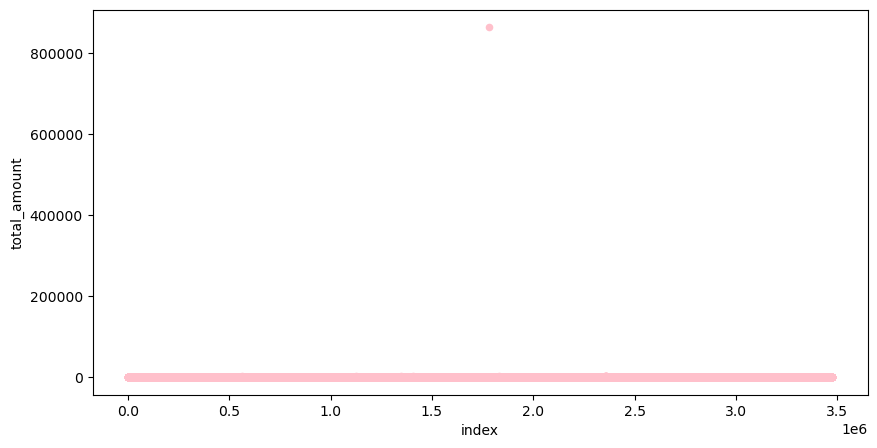

In [861]:
taxi_data.reset_index().plot(kind='scatter', color='pink', y='total_amount', x='index', figsize=(10,5))

In [543]:
taxi_data[taxi_data['total_amount']>200].shape

(1913, 10)

In [545]:
taxi_data['total_amount'].mean()

25.61129169728817

## 3. Data Cleaning

### 3.1 - Handling Invalid Fare Amounts (Negative and Extremely Large Values)

In [549]:
taxi_data_filtered = taxi_data[(taxi_data['total_amount']>=0)&(taxi_data['total_amount']<200)]

In [551]:
print(taxi_data.shape)
taxi_data_filtered.shape

(3475226, 10)


(3410271, 10)

In [553]:
taxi_data_filtered.isna().sum()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          536722
trip_distance                 0
RatecodeID               536722
PULocationID                  0
DOLocationID                  0
payment_type                  0
total_amount                  0
dtype: int64

### 3.2 - Investigating Missing or Suspicious Values (Passenger Count & RatecodeID)


In [580]:
taxi_data_filtered[taxi_data_filtered['passenger_count']==0].shape

(24639, 10)

In [582]:
taxi_data_filtered[taxi_data_filtered['passenger_count'].isna()].head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
2935077         2  2025-01-01 00:39:17   2025-01-01 01:10:42              NaN   
2935078         2  2025-01-01 00:33:40   2025-01-01 01:10:34              NaN   
2935079         1  2025-01-01 00:09:32   2025-01-01 00:12:38              NaN   
2935080         2  2025-01-01 00:21:42   2025-01-01 00:36:29              NaN   
2935081         2  2025-01-01 00:56:04   2025-01-01 01:06:11              NaN   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
2935077           6.75         NaN            48            42             0   
2935078           3.88         NaN             4            48             0   
2935079           0.00         NaN           158           158             0   
2935080           3.55         NaN           137           211             0   
2935081           1.55         NaN           140           233             0   

         total_amount  
2935077         14.90  
2935078         10.02  
2935079         26.72  
2935080          5.80  
2935081          9.06

In [584]:
taxi_data_filtered[taxi_data_filtered['passenger_count']==0].head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
6          1  2025-01-01 00:14:47   2025-01-01 00:16:15              0.0   
7          1  2025-01-01 00:39:27   2025-01-01 00:51:51              0.0   
8          1  2025-01-01 00:53:43   2025-01-01 01:13:23              0.0   
94         1  2025-01-01 00:11:27   2025-01-01 00:16:58              0.0   
95         1  2025-01-01 00:19:30   2025-01-01 00:27:25              0.0   

    trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
6             0.4         1.0           170           170             1   
7             1.6         1.0           234           148             1   
8             2.8         1.0           148           170             1   
94            0.7         1.0           144           211             1   
95            1.0         1.0           211           158             1   

    total_amount  
6          11.75  
7          19.10  
8          27.10  
94         12.20  
95         17.15

In [589]:
## Removing the null values 
taxi_data_filtered = taxi_data_filtered.dropna(subset=['passenger_count'])
taxi_data_filtered.isna().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
total_amount             0
dtype: int64

## 4. Data Preparation 

### 4.1 - Copying Dataset for Preparation

In [719]:
# Coping the filtered data frame 
taxi_data_prepared = taxi_data_filtered.copy()

In [723]:
# Checking all data types
taxi_data_prepared.dtypes

VendorID                          int32
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
PULocationID                      int32
DOLocationID                      int32
payment_type                      int64
total_amount                    float64
dtype: object

In [725]:
# Checking if there are any decimal values in passenger_type
(taxi_data_prepared['passenger_count'] % 1 != 0).sum()

0

### 4.2 - Converting Variables to Appropriate Data Types

In [727]:
taxi_data_prepared['RatecodeID']      = taxi_data_prepared['RatecodeID'].astype(str)
taxi_data_prepared['PULocationID']    = taxi_data_prepared['PULocationID'].astype(str)
taxi_data_prepared['DOLocationID']    = taxi_data_prepared['DOLocationID'].astype(str)
taxi_data_prepared['payment_type']    = taxi_data_prepared['payment_type'].astype(str)
taxi_data_prepared['passenger_count'] = taxi_data_prepared['passenger_count'].astype(int)

In [728]:
taxi_data_prepared.dtypes

VendorID                          int32
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                   int32
trip_distance                   float64
RatecodeID                       object
PULocationID                     object
DOLocationID                     object
payment_type                     object
total_amount                    float64
dtype: object

In [731]:
taxi_data_prepared.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2025-01-01 00:18:38   2025-01-01 00:26:59                1   
1         1  2025-01-01 00:32:40   2025-01-01 00:35:13                1   
2         1  2025-01-01 00:44:04   2025-01-01 00:46:01                1   
3         2  2025-01-01 00:14:27   2025-01-01 00:20:01                3   
4         2  2025-01-01 00:21:34   2025-01-01 00:25:06                3   

   trip_distance RatecodeID PULocationID DOLocationID payment_type  \
0           1.60        1.0          229          237            1   
1           0.50        1.0          236          237            1   
2           0.60        1.0          141          141            1   
3           0.52        1.0          244          244            2   
4           0.66        1.0          244          116            2   

   total_amount  
0         18.00  
1         12.12  
2         12.10  
3          9.70  
4          8.30

### 4.3 - Extracting Data and Time for Income Analysis

In [733]:
taxi_data_prepared['transaction_date']  = pd.to_datetime(taxi_data_prepared['tpep_pickup_datetime'].dt.date)
taxi_data_prepared['transaction_year']  = taxi_data_prepared['tpep_pickup_datetime'].dt.year
taxi_data_prepared['transaction_month'] = taxi_data_prepared['tpep_pickup_datetime'].dt.month
taxi_data_prepared['transaction_day']   = taxi_data_prepared['tpep_pickup_datetime'].dt.day
taxi_data_prepared['transaction_hour']  = taxi_data_prepared['tpep_pickup_datetime'].dt.hour

In [734]:
taxi_data_prepared.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2025-01-01 00:18:38   2025-01-01 00:26:59                1   
1         1  2025-01-01 00:32:40   2025-01-01 00:35:13                1   
2         1  2025-01-01 00:44:04   2025-01-01 00:46:01                1   
3         2  2025-01-01 00:14:27   2025-01-01 00:20:01                3   
4         2  2025-01-01 00:21:34   2025-01-01 00:25:06                3   

   trip_distance RatecodeID PULocationID DOLocationID payment_type  \
0           1.60        1.0          229          237            1   
1           0.50        1.0          236          237            1   
2           0.60        1.0          141          141            1   
3           0.52        1.0          244          244            2   
4           0.66        1.0          244          116            2   

   total_amount transaction_date  transaction_year  transaction_month  \
0         18.00       2025-01-01              2025                  1   
1         12.12       2025-01-01              2025                  1   
2         12.10       2025-01-01              2025                  1   
3          9.70       2025-01-01              2025                  1   
4          8.30       2025-01-01              2025                  1   

   transaction_day  transaction_hour  
0                1                 0  
1                1                 0  
2                1                 0  
3                1                 0  
4                1                 0

In [751]:
(taxi_data_prepared['transaction_year']!=2025).sum()

21

In [753]:
taxi_data_prepared[taxi_data_prepared['transaction_year']!=2025].head(21)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
605           2  2024-12-31 23:30:03   2024-12-31 23:43:02                1   
687           2  2024-12-31 23:31:38   2024-12-31 23:41:48                1   
688           2  2024-12-31 23:46:38   2025-01-01 00:03:03                1   
861           2  2024-12-31 23:56:19   2025-01-01 00:11:19                6   
1108          2  2024-12-31 23:55:37   2025-01-01 00:01:26                1   
1312          2  2024-12-31 23:52:40   2025-01-01 00:23:03                1   
2276          2  2024-12-31 23:49:24   2024-12-31 23:57:30                1   
3941          2  2024-12-31 23:27:13   2024-12-31 23:35:48                1   
3942          2  2024-12-31 23:37:42   2024-12-31 23:43:10                1   
4324          2  2024-12-31 23:51:20   2025-01-01 00:00:00                1   
4370          2  2024-12-31 23:53:51   2025-01-01 00:16:32                1   
4654          2  2024-12-31 23:24:31   2024-12-31 23:25:35                5   
4655          2  2024-12-31 23:25:38   2025-01-01 01:01:53                5   
5217          2  2024-12-31 23:48:48   2024-12-31 23:55:13                1   
5335          2  2024-12-31 23:48:29   2025-01-01 00:04:04                1   
7623          2  2024-12-31 20:47:55   2024-12-31 20:54:00                2   
7624          2  2024-12-31 20:54:50   2024-12-31 21:30:18                2   
7625          2  2024-12-31 21:20:05   2024-12-31 21:35:13                2   
17542         2  2024-12-31 20:52:50   2024-12-31 21:09:34                2   
20611         2  2024-12-31 21:15:22   2024-12-31 21:26:00                2   
20612         2  2024-12-31 21:33:43   2024-12-31 21:39:00                2   

       trip_distance RatecodeID PULocationID DOLocationID payment_type  \
605             3.00        1.0          246           13            1   
687             1.03        1.0           43          140            2   
688             3.95        1.0          229           24            2   
861             2.28        1.0           68          107            1   
1108            1.12        1.0           56           56            2   
1312            6.72        1.0          114          151            1   
2276            2.44        1.0          142          151            1   
3941            1.53        1.0          170          141            1   
3942            0.92        1.0          229          141            1   
4324           12.89        1.0          138           40            1   
4370            3.23        1.0          163           79            1   
4654            0.28        1.0          132          132            2   
4655           18.78        2.0          132          142            1   
5217            0.99        1.0          114          148            1   
5335            2.53        1.0          186           79            2   
7623            1.72        1.0           48          246            1   
7624            1.39        1.0          246           48            1   
7625            2.64        1.0           42          238            1   
17542           5.05        1.0          249          262            1   
20611           3.20        1.0          141          146            1   
20612           1.12        1.0          179            7            2   

       total_amount transaction_date  transaction_year  transaction_month  \
605           26.62       2024-12-31              2024                 12   
687           15.70       2024-12-31              2024                 12   
688           24.10       2024-12-31              2024                 12   
861           23.88       2024-12-31              2024                 12   
1108          10.40       2024-12-31              2024                 12   
1312          47.40       2024-12-31              2024                 12   
2276          20.52       2024-12-31              2024                 12   
3941          18.00    

In [765]:
taxi_data_prepared = taxi_data_prepared[taxi_data_prepared['transaction_year']==2025]
(taxi_data_prepared['transaction_year']!=2025).sum()

0

In [763]:
taxi_data_prepared = taxi_data_prepared[taxi_data_prepared['transaction_month']==1]
(taxi_data_prepared['transaction_month']!=1).sum()

0

In [790]:
taxi_data_prepared.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'total_amount', 'transaction_date',
       'transaction_year', 'transaction_month', 'transaction_day',
       'transaction_hour'],
      dtype='object')

### 4.4 - Aggergating Data by Time and Region

In [879]:
categorical_columns = ['PULocationID', 'transaction_date', 'transaction_month', 'transaction_day',
       'transaction_hour']
numerical_columns = ['trip_distance', 'total_amount']
all_needed_columns = categorical_columns + numerical_columns

In [881]:
main_taxi_df = taxi_data_prepared[all_needed_columns]
print(main_taxi_df.shape)
main_taxi_df.head()

(2873527, 7)


PULocationID transaction_date  transaction_month  transaction_day  \
0          229       2025-01-01                  1                1   
1          236       2025-01-01                  1                1   
2          141       2025-01-01                  1                1   
3          244       2025-01-01                  1                1   
4          244       2025-01-01                  1                1   

   transaction_hour  trip_distance  total_amount  
0                 0           1.60         18.00  
1                 0           0.50         12.12  
2                 0           0.60         12.10  
3                 0           0.52          9.70  
4                 0           0.66          8.30

In [887]:
taxi_grouped_by_region = main_taxi_df.groupby(categorical_columns).mean().reset_index() 
taxi_grouped_by_region['count_of_transactions'] = main_taxi_df.groupby(categorical_columns).count().reset_index()['total_amount']

In [889]:
print(taxi_grouped_by_region.shape)
taxi_grouped_by_region.head()

(75880, 8)


PULocationID transaction_date  transaction_month  transaction_day  \
0            1       2025-01-01                  1                1   
1            1       2025-01-01                  1                1   
2            1       2025-01-01                  1                1   
3            1       2025-01-01                  1                1   
4            1       2025-01-01                  1                1   

   transaction_hour  trip_distance  total_amount  count_of_transactions  
0                 6       0.100000       115.000                      1  
1                 9       0.000000       132.510                      4  
2                12       0.000000       106.200                      2  
3                13       1.333333        56.400                      3  
4                14       2.160000        70.205                      2

## 5. Benchmark Model

### 5.1 - Setting Up Inputs for the Benchmark Model

In [893]:
data_for_benchmark_model = taxi_grouped_by_region.copy()
data_for_benchmark_model.head()

PULocationID transaction_date  transaction_month  transaction_day  \
0            1       2025-01-01                  1                1   
1            1       2025-01-01                  1                1   
2            1       2025-01-01                  1                1   
3            1       2025-01-01                  1                1   
4            1       2025-01-01                  1                1   

   transaction_hour  trip_distance  total_amount  count_of_transactions  
0                 6       0.100000       115.000                      1  
1                 9       0.000000       132.510                      4  
2                12       0.000000       106.200                      2  
3                13       1.333333        56.400                      3  
4                14       2.160000        70.205                      2

In [906]:
# Dropped the transcation_date
categorical_features_benchmark = ['PULocationID', 'transaction_month', 'transaction_day', 'transaction_hour']

# input_features_benchmark contains all the features used to train the model
input_features_benchmark  = categorical_features_benchmark + ['trip_distance']

# target_feature_benchmark is the value the model will try to predict
target_features_benchmark = 'total_amount'

### 5.2 - Train-Test Split

In [947]:
# Import library to train and test model
from sklearn.model_selection import train_test_split

X_bench = data_for_benchmark_model[input_features_benchmark]
y_bench = data_for_benchmark_model[target_features_benchmark]

# one-hot encoding
X_bench = pd.get_dummies(X_bench)

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_bench, y_bench, test_size = 0.33, random_state = 42)

In [949]:
print("X_train shape:", X_train_b.shape)
print("X_test shape:", X_test_b.shape)
print("y_train shape:", y_train_b.shape)
print("y_test shape:", y_test_b.shape)

X_train shape: (50839, 260)
X_test shape: (25041, 260)
y_train shape: (50839,)
y_test shape: (25041,)


In [951]:
train_rows = set(X_train_b.index)
test_rows = set(X_test_b.index)
overlap = train_rows.intersection(test_rows)

print("Overlap:", len(overlap))

Overlap: 0


### 5.3 - Fit a Model to the Data

In [959]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_train_b, y_train_b)

DecisionTreeRegressor(max_depth=10)

### 5.4 - Model Evaluation